In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [135]:
#loading data file
data = pd.read_csv('data.csv')

In [136]:
data.head(10)

,car_ID,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,alfa-romero stelvio,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,alfa-romero Quadrifoglio,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,audi 100 ls,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,audi 100ls,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,audi fox,two,sedan,99.8,177.3,66.3,53.1,2507,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,audi 100ls,four,sedan,105.8,192.7,71.4,55.7,2844,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,audi 5000,four,wagon,105.8,192.7,71.4,55.7,2954,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,audi 4000,four,sedan,105.8,192.7,71.4,55.9,3086,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,audi 5000s (diesel),two,hatchback,99.5,178.2,67.9,52.0,3053,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   cylindernumber    205 non-null    object 
 10  enginesize        205 non-null    int64  
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [138]:
data = data.drop_duplicates()

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   cylindernumber    205 non-null    object 
 10  enginesize        205 non-null    int64  
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [140]:
print(data.shape)

(205, 20)


In [141]:
#finding null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   cylindernumber    205 non-null    object 
 10  enginesize        205 non-null    int64  
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [142]:
#outlier detection IQR range
data = data.drop(['car_ID'], axis=1)

data['CarName'] = data['CarName'].str.split(' ',expand=True)

data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [143]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64


In [144]:
print(data < (Q1 - 1.5 * IQR)) or (data > (Q3 + 1.5 * IQR))

     CarName  boreratio  carbody  carheight  carlength  carwidth  citympg  \
0      False      False    False      False      False     False    False   
1      False      False    False      False      False     False    False   
2      False      False    False      False      False     False    False   
3      False      False    False      False      False     False    False   
4      False      False    False      False      False     False    False   
5      False      False    False      False      False     False    False   
6      False      False    False      False      False     False    False   
7      False      False    False      False      False     False    False   
8      False      False    False      False      False     False    False   
9      False      False    False      False      False     False    False   
10     False      False    False      False      False     False    False   
11     False      False    False      False      False     False    False   

,CarName,boreratio,carbody,carheight,carlength,carwidth,citympg,compressionratio,curbweight,cylindernumber,doornumber,enginesize,fuelsystem,highwaympg,horsepower,peakrpm,price,stroke,wheelbase
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [145]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(139, 19)

### Categorical columns

In [146]:
categorical_cols=data.select_dtypes(include=['object']).columns
data[categorical_cols].head(2)

,CarName,doornumber,carbody,cylindernumber,fuelsystem
0,alfa-romero,two,convertible,four,mpfi
1,alfa-romero,two,convertible,four,mpfi


### Numerical columns

In [147]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


In [148]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,97.648201,171.489209,65.294964,53.580576,2408.762590,115.683453,3.266331,3.266187,8.971367,96.949640,5220.503597,25.726619,31.568345,10922.510791
std,4.528610,10.695683,1.514391,2.432476,403.637439,26.215671,0.246286,0.185484,0.532701,29.362384,409.170819,5.533568,5.608030,4500.010567
min,86.600000,144.600000,61.800000,48.800000,1819.000000,70.000000,2.680000,2.680000,7.500000,60.000000,4200.000000,16.000000,22.000000,5195.000000
25%,94.500000,165.300000,63.900000,51.800000,2026.000000,92.000000,3.050000,3.150000,8.700000,70.000000,5000.000000,21.000000,28.000000,7372.000000
50%,96.300000,171.700000,65.200000,53.900000,2370.000000,110.000000,3.190000,3.270000,9.000000,90.000000,5200.000000,25.000000,32.000000,9258.000000
75%,100.100000,177.550000,66.500000,55.100000,2712.000000,130.000000,3.430000,3.400000,9.400000,114.000000,5500.000000,31.000000,37.000000,13572.000000
max,114.200000,198.900000,68.900000,59.800000,3296.000000,181.000000,3.940000,3.580000,10.100000,175.000000,6000.000000,38.000000,47.000000,24565.000000


In [149]:
df=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})

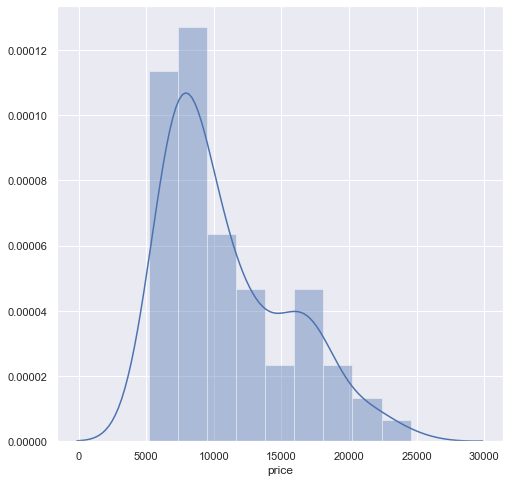

In [150]:
sns.distplot(data['price'],kde=True)

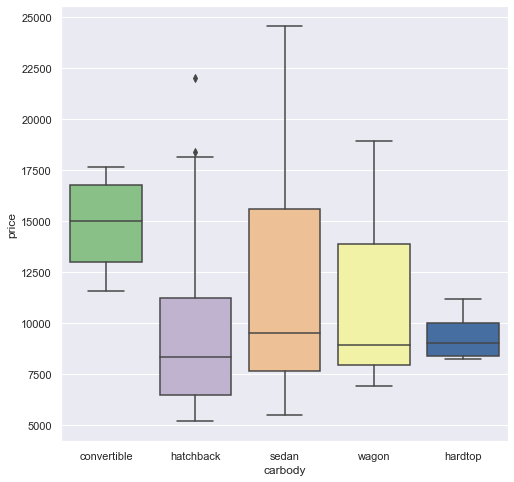

In [151]:
sns.boxplot(x = 'carbody', y = 'price', data = data,palette='Accent')

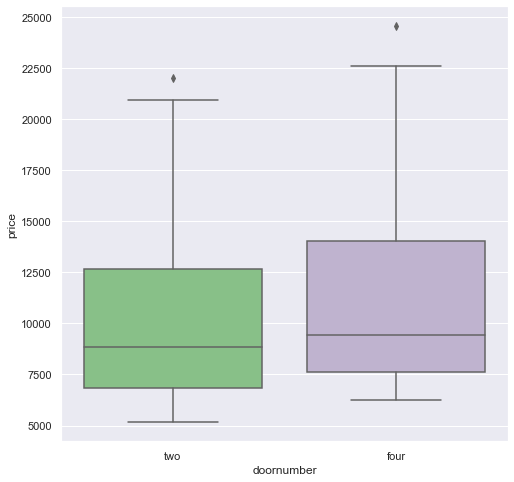

In [152]:
sns.boxplot(x = 'doornumber', y = 'price', data = data,palette='Accent')

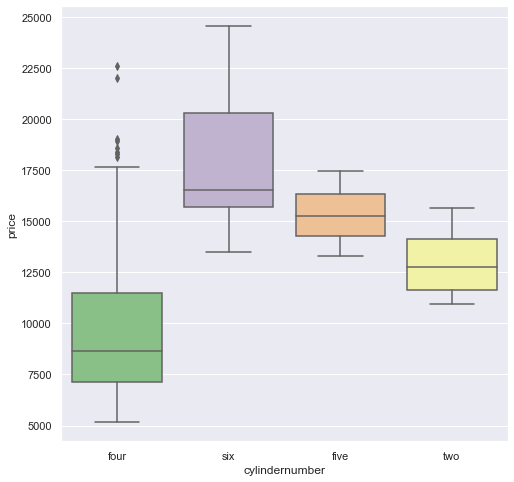

In [153]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = data,palette='Accent')

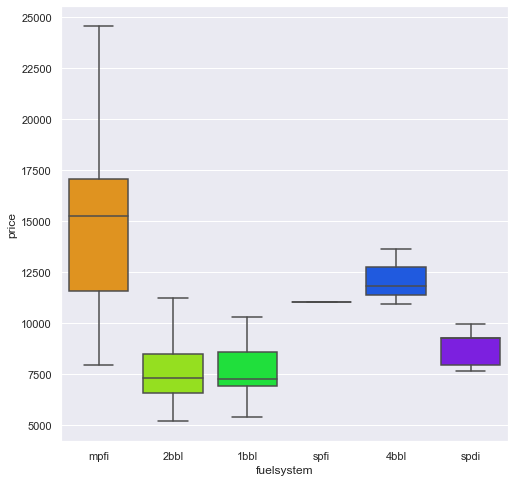

In [154]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = data,palette='gist_rainbow')

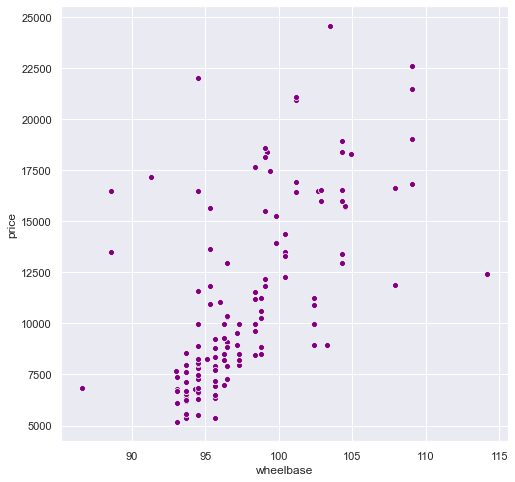

In [155]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple')

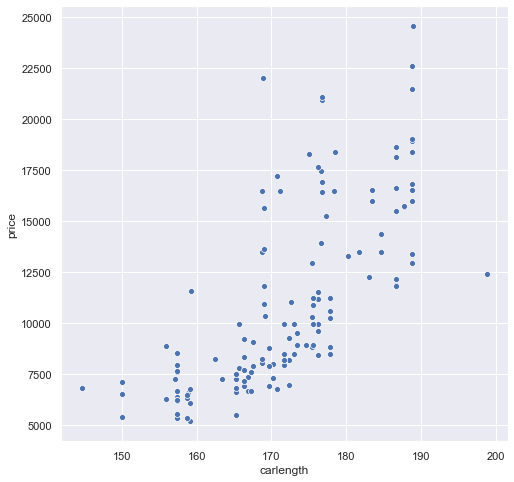

In [156]:
sns.scatterplot(x="carlength", y="price", data=data,color='b')

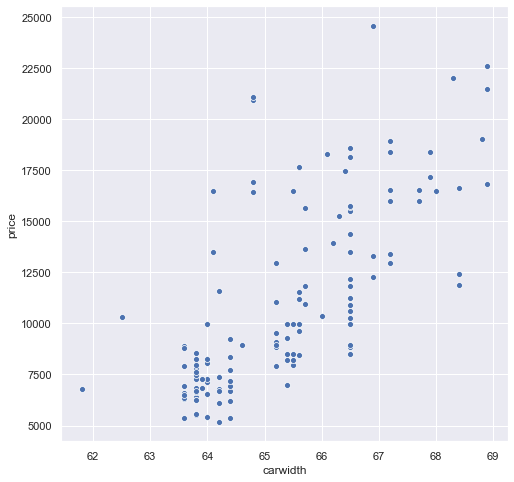

In [157]:
sns.scatterplot(x="carwidth", y="price", data=data,color='b')

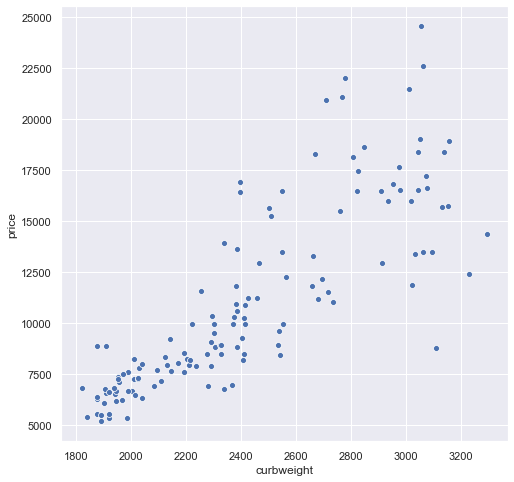

In [158]:
sns.scatterplot(x="curbweight", y="price", data=data,color='b')

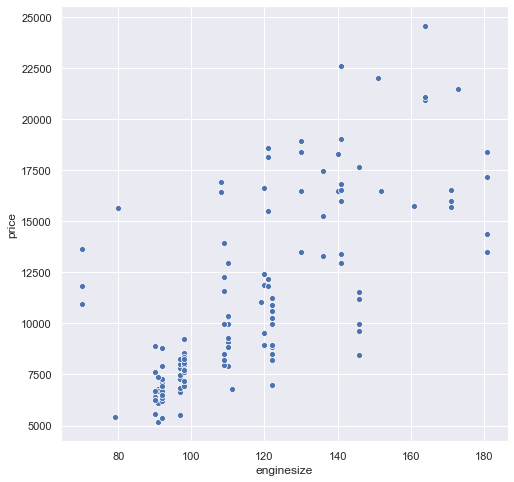

In [159]:
sns.scatterplot(x="enginesize", y="price", data=data,color='b')

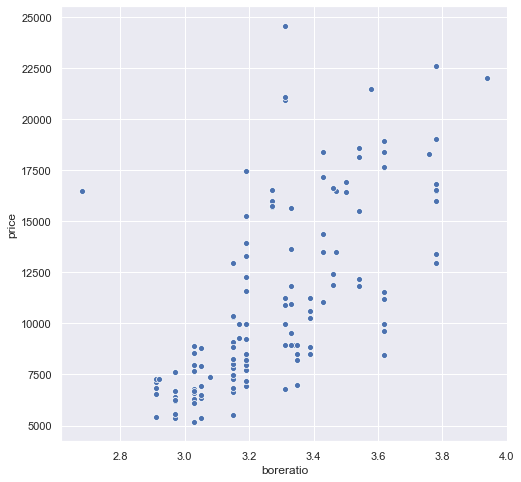

In [160]:
sns.scatterplot(x="boreratio", y="price", data=data,color='b')

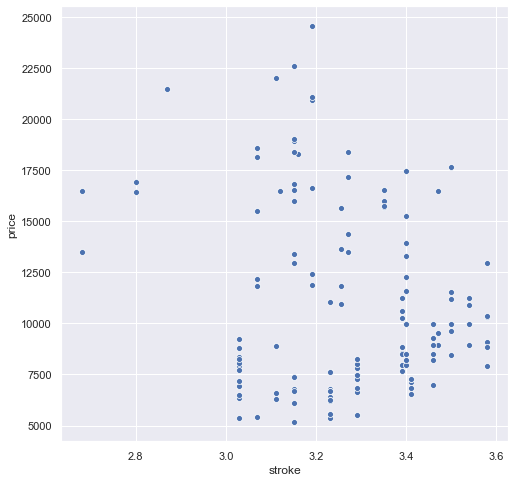

In [161]:
sns.scatterplot(x="stroke", y="price", data=data,color='b')

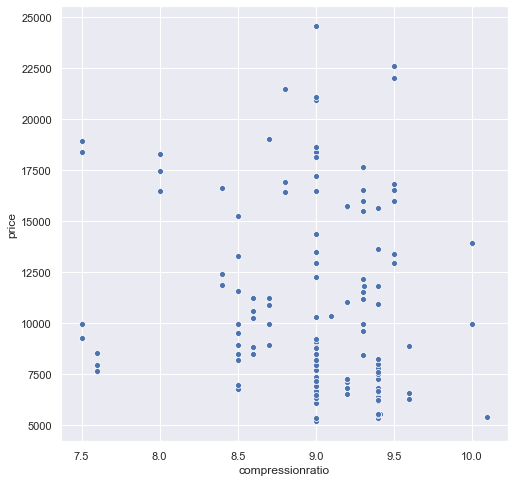

In [162]:
sns.scatterplot(x="compressionratio", y="price", data=data,color='b')

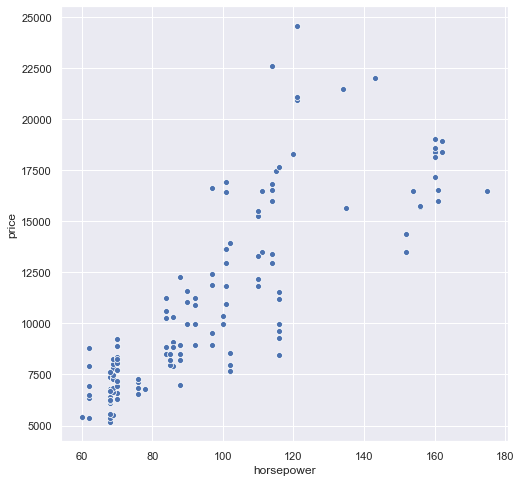

In [163]:
sns.scatterplot(x="horsepower", y="price", data=data,color='b')

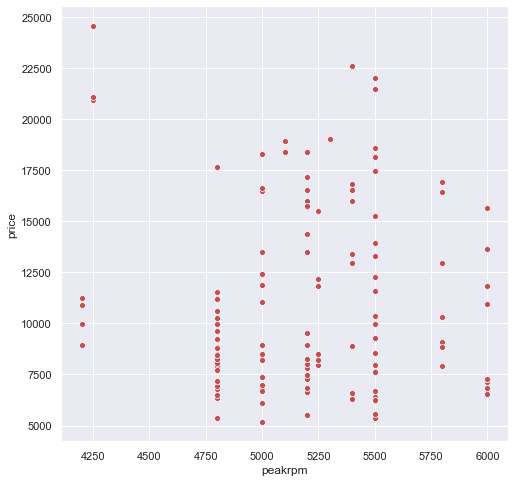

In [164]:
sns.scatterplot(x="peakrpm", y="price", data=data,color='r')

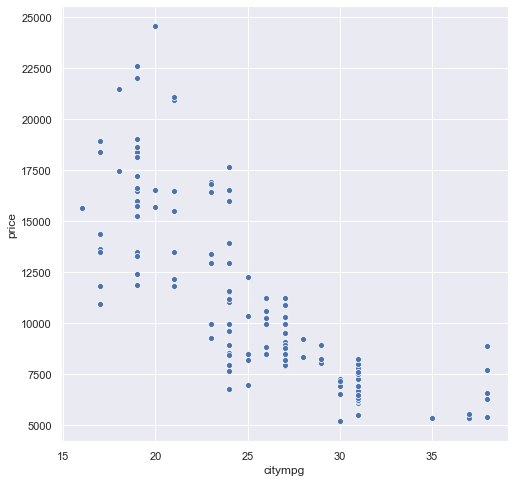

In [165]:
sns.scatterplot(x="citympg", y="price", data=data,color='b')

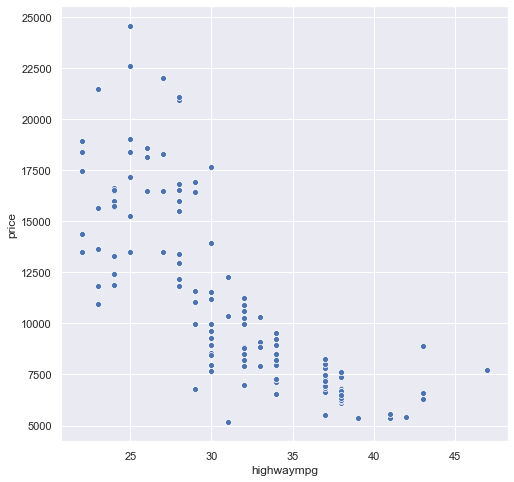

In [166]:
sns.scatterplot(x="highwaympg", y="price", data=data,color='b')

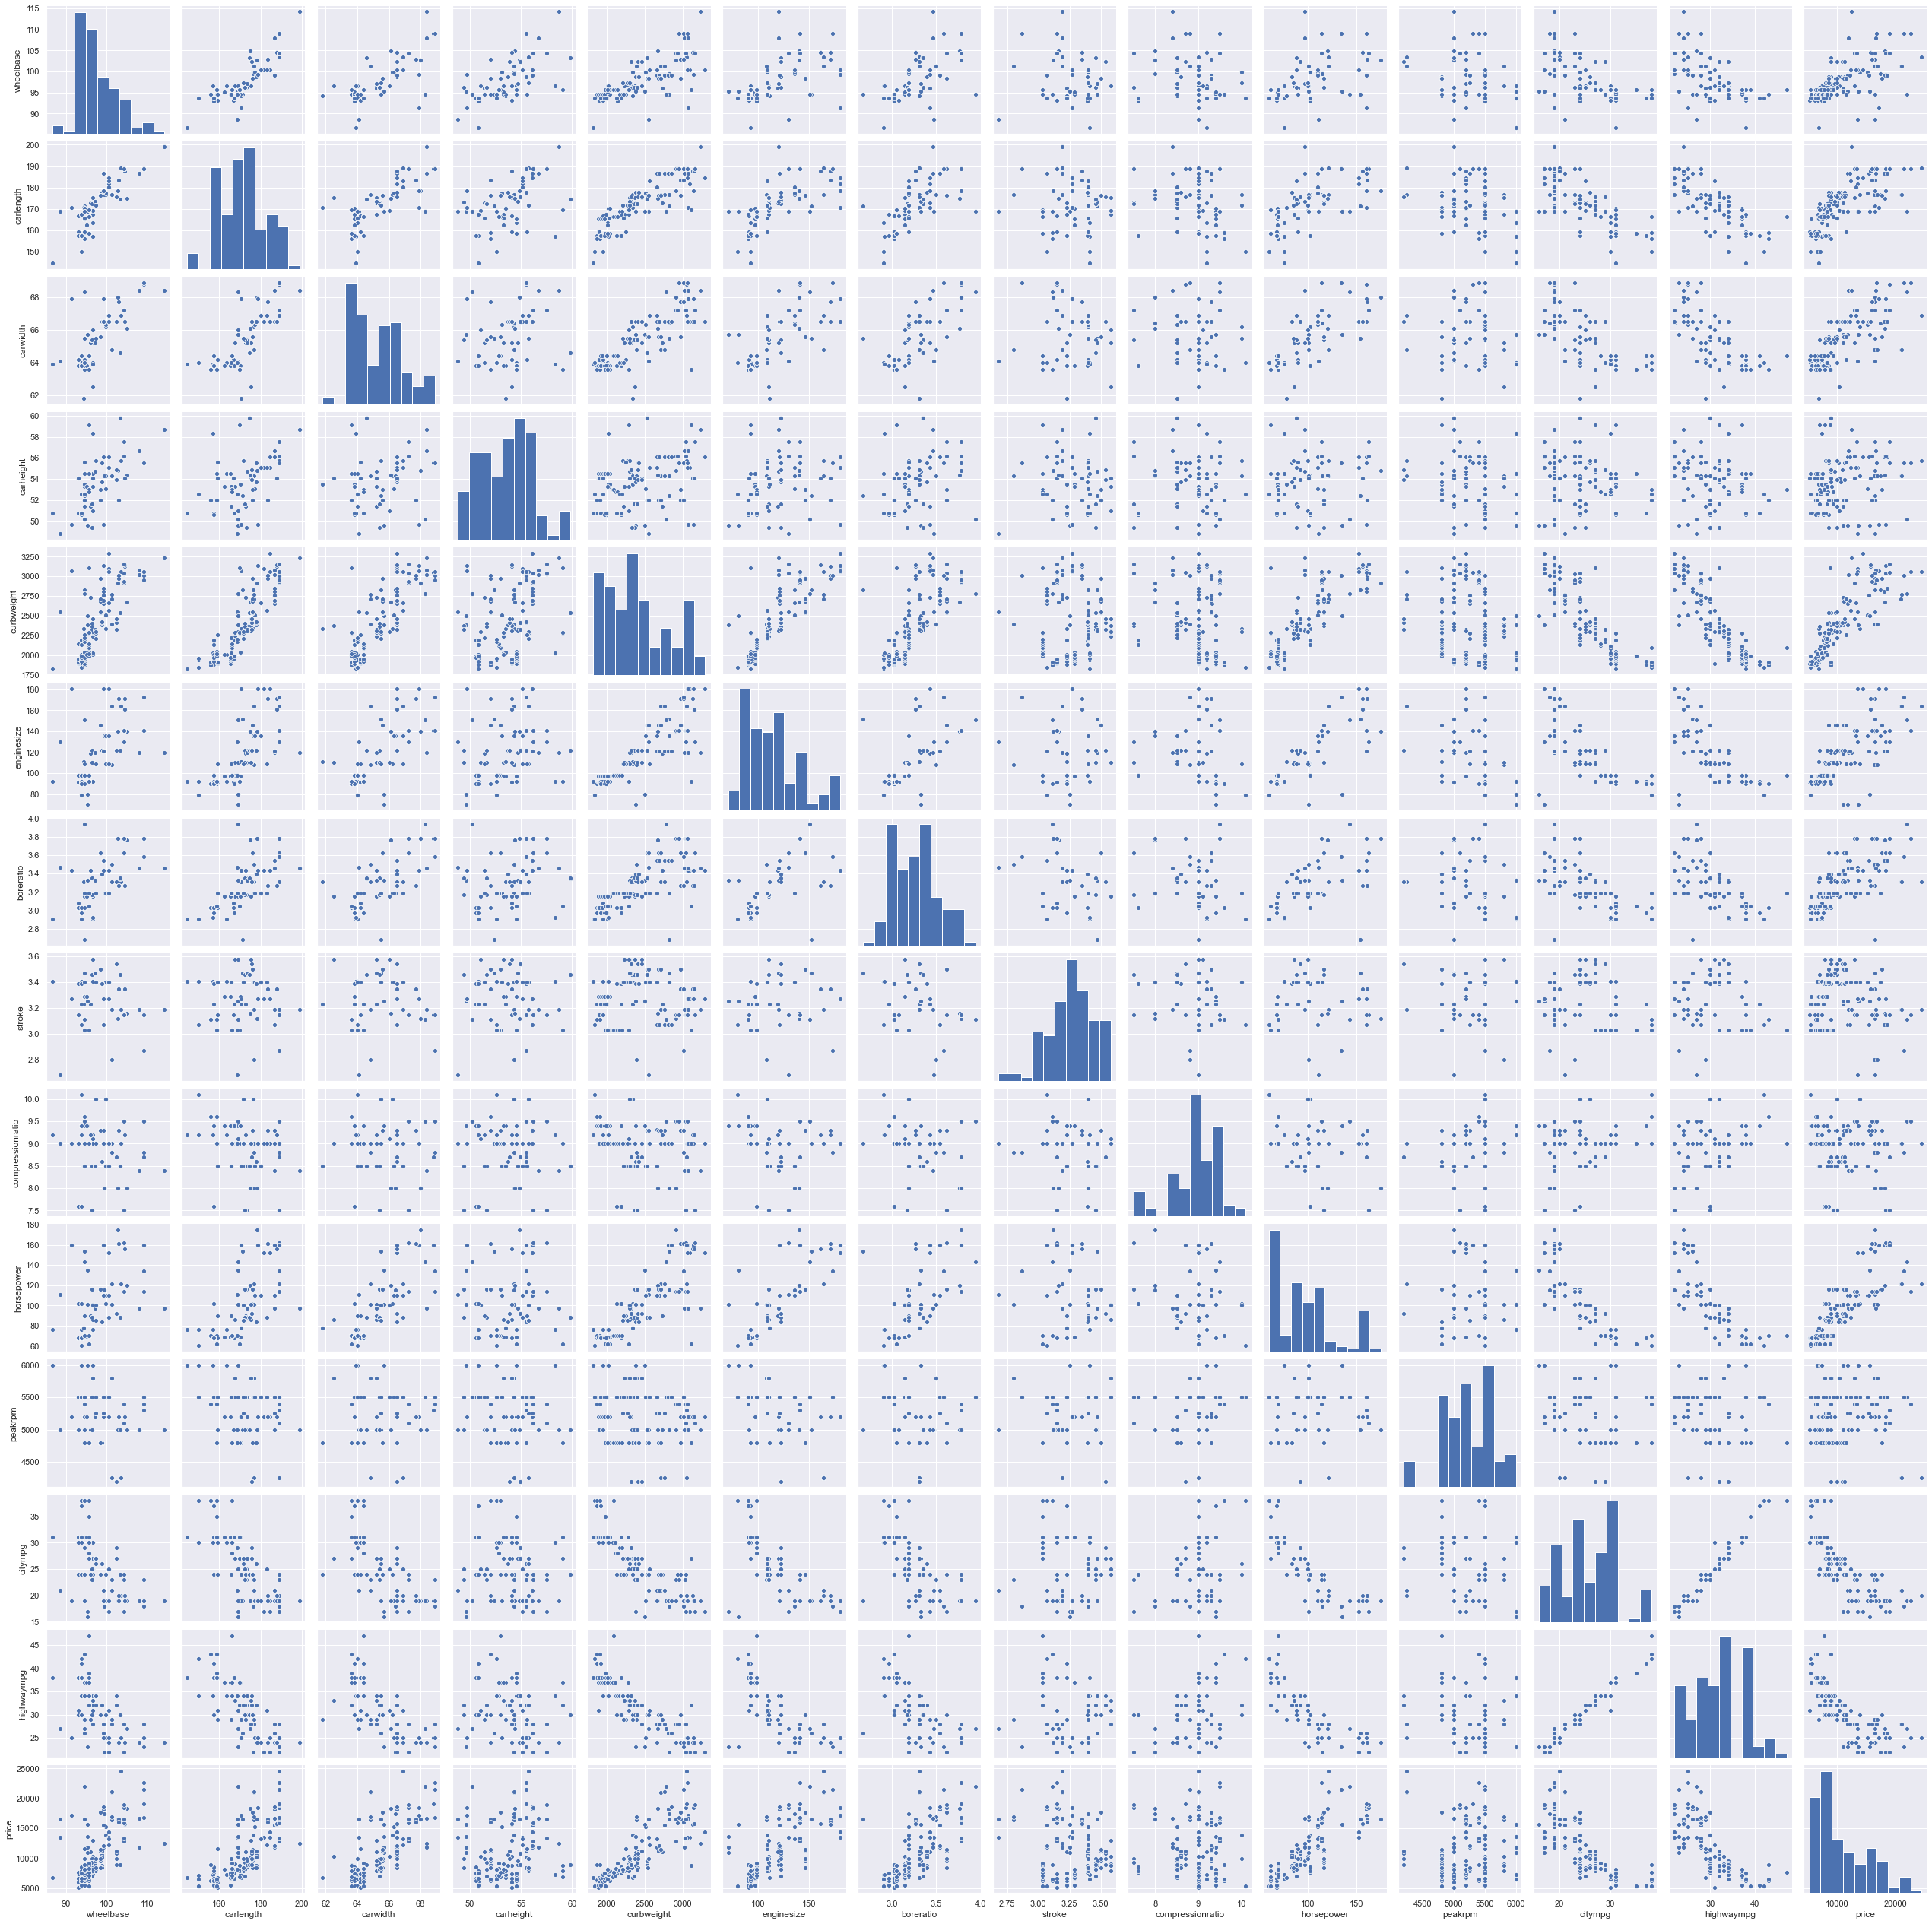

In [192]:
ax = sns.pairplot(data[numerical_cols])

In [168]:
data[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.830703,0.780475,0.586796,0.739128,0.580014,0.645720,0.027809,-0.180025,0.515469,-0.229096,-0.543541,-0.578421,0.619377
carlength,0.830703,1.000000,0.802521,0.498097,0.868877,0.704487,0.768027,-0.008049,-0.165483,0.668313,-0.256648,-0.723117,-0.725348,0.716798
carwidth,0.780475,0.802521,1.000000,0.270002,0.805567,0.683059,0.725320,0.064580,-0.139796,0.717525,-0.100638,-0.699382,-0.707852,0.730877
carheight,0.586796,0.498097,0.270002,1.000000,0.353165,0.193093,0.271055,-0.065950,-0.083327,0.056812,-0.255911,-0.145860,-0.185372,0.188359
curbweight,0.739128,0.868877,0.805567,0.353165,1.000000,0.823122,0.734303,-0.032043,-0.203319,0.827733,-0.190080,-0.832581,-0.847877,0.827155
enginesize,0.580014,0.704487,0.683059,0.193093,0.823122,1.000000,0.624519,0.108284,-0.129500,0.794030,-0.328112,-0.646633,-0.654606,0.721929
boreratio,0.645720,0.768027,0.725320,0.271055,0.734303,0.624519,1.000000,-0.144325,-0.096708,0.621587,-0.215439,-0.639859,-0.626173,0.679488
stroke,0.027809,-0.008049,0.064580,-0.065950,-0.032043,0.108284,-0.144325,1.000000,-0.186029,0.050365,0.066871,-0.052103,-0.055931,-0.182817
compressionratio,-0.180025,-0.165483,-0.139796,-0.083327,-0.203319,-0.129500,-0.096708,-0.186029,1.000000,-0.257335,0.152268,0.370886,0.351069,-0.119159
horsepower,0.515469,0.668313,0.717525,0.056812,0.827733,0.794030,0.621587,0.050365,-0.257335,1.000000,0.006329,-0.825478,-0.821783,0.810714


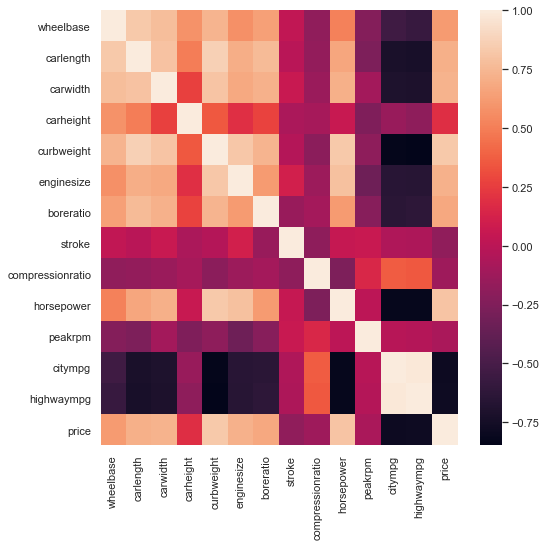

In [169]:
sns.heatmap(data[numerical_cols].corr())

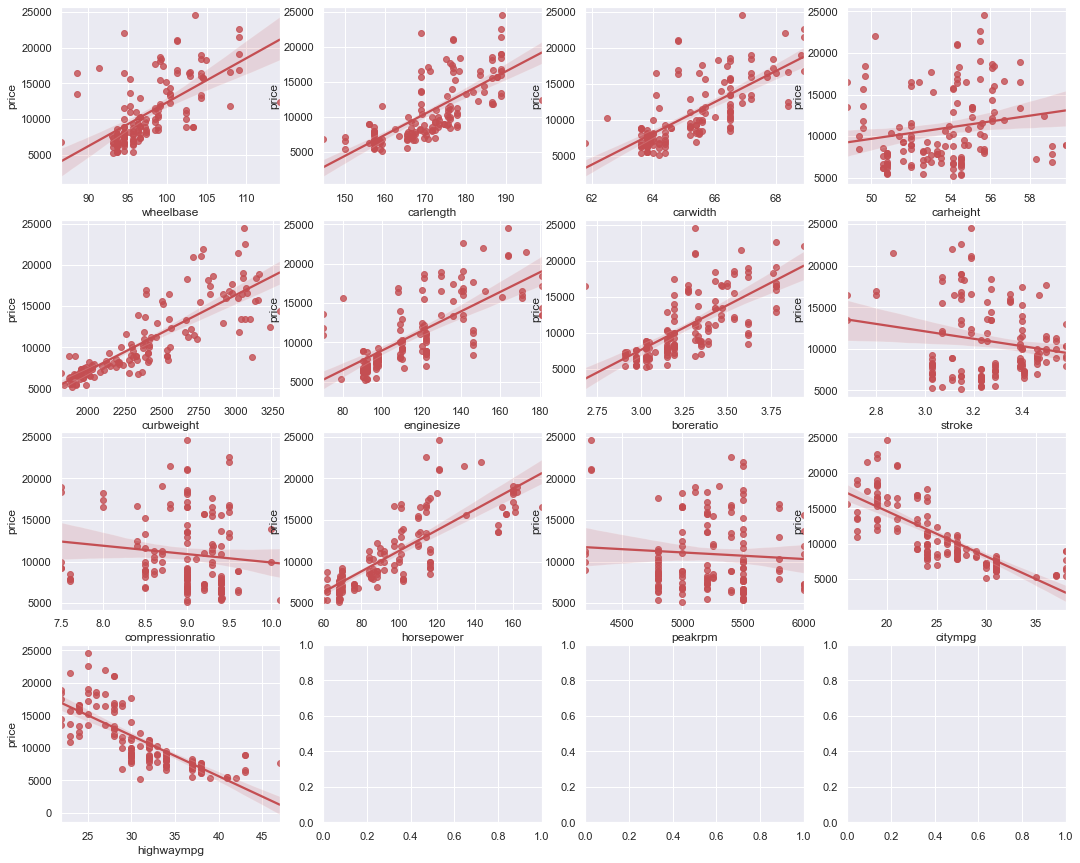

In [70]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=data,ax=axes[x][y],color='r')

In [187]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X = X.drop(['CarName','price', 'doornumber', 'cylindernumber'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [188]:
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)
lreg.score(X_test,y_test)

0.7584412104215548

In [189]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [190]:
X_new = X
temp = fii.summary2().tables[1].reset_index()

for i in range(len(fii.summary2().tables[1])):
    if(temp['P>|t|'][i] < 0.05):
        X_new = X_new.drop(temp['index'][i], axis=1)
        
X_new_train, X_new_test, y_train_new, y_test_new = train_test_split(X_new, y, random_state = 0)

In [191]:
lreg_new = linear_model.LinearRegression()
lreg_new.fit(X_new_train, y_train_new)
y_train_pred_new = lreg_new.predict(X_new_train)
y_test_pred_new = lreg_new.predict(X_new_test)
lreg_new.score(X_new_test,y_test_new)

0.685319496275938